<a href="https://colab.research.google.com/github/nadern87/BassDataOsmnx/blob/main/Feature_Extraction_Techniques%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Bass_BigTable.csv")

In [3]:
df.head(5)

,Price,Id,Size,Format,City,Impression,B01001001,B01001002,B01001003,B01001004,...,serviceRoad,trackRoad,footwayRoad,pathRoad,traffic_signals,aggr_residential_zone,aggr_commercial_zone,aggr_natural_zone,BFP_Count,BFP_Area
0,700,1,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,43,5,4,0,0,2,1,29,22,694.83
1,700,2,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,52,3,17,0,0,3,1,30,12,486.00
2,700,3,44.6,Stacked,Lacassine LA,68992,4641,2198,174,162,...,183,10,1,0,0,1,0,42,38,919.75
3,700,4,44.6,Individual,Baldwin LA,24379,1534,876,6,0,...,66,2,0,0,0,0,0,21,125,1430.83
4,825,6,44.6,Individual,Lacassine LA,68992,5384,2919,213,152,...,43,5,4,0,0,2,1,29,22,694.83


Before feeding this data into our Machine Learning models I decided to divide our data into features (X) and labels (Y) and One Hot Encode all the Categorical Variables.

In [4]:
X = df.drop(['Price'], axis = 1)
Y = df['Price']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

Successively, I decided to create a function (forest_test) to divide the input data into train and test sets and then train and test a Random Forest Classifier.

In [5]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

We can now use this function using the whole dataset and then use it successively to compare these results when using instead of the whole dataset just a reduced version.

In [6]:
forest_test(X, Y)

1.3709388820000008
[[ 0  0  1  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0 12  0  1  1  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.67      0.86      0.75        14
           3       0.00      0.00      0.00         1
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.59        22
   macro avg       0.14      0.19      0.16        22
weighted avg       0.45      0.59      0.51        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

As shown below, training a Random Forest classifier using all the features, led to 59% Accuracy in about 1.37s of training time. In each of the following examples, the training time of each model will be printed out on the first line of each snippet for your reference.

##Feature Extraction
##Principle Components Analysis (PCA)
PCA is one of the most used linear dimensionality reduction technique. When using PCA, we take as input our original data and try to find a combination of the input features which can best summarize the original data distribution so that to reduce its original dimensions. PCA is able to do this by maximizing variances and minimizing the reconstruction error by looking at pair wised distances. In PCA, our original data is projected into a set of orthogonal axes and each of the axes gets ranked in order of importance.

PCA is an unsupervised learning algorithm, therefore it doesn’t care about the data labels but only about variation. This can lead in some cases to misclassification of data.

In this example, I will first perform PCA in the whole dataset to reduce our data to just two dimensions and I will then construct a data frame with our new features and their respective labels.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['Price']], axis = 1)
PCA_df['Price'] = LabelEncoder().fit_transform(PCA_df['Price'])
PCA_df.head()

,PC1,PC2,Price
0,11.189566,-1.338423,2
1,11.223435,-1.265473,2
2,7.603653,-2.617212,2
3,-18.301513,-5.897074,2
4,11.191057,-1.340800,5


Using our newly created data frame, we can now plot our data distribution in a 2D scatter plot

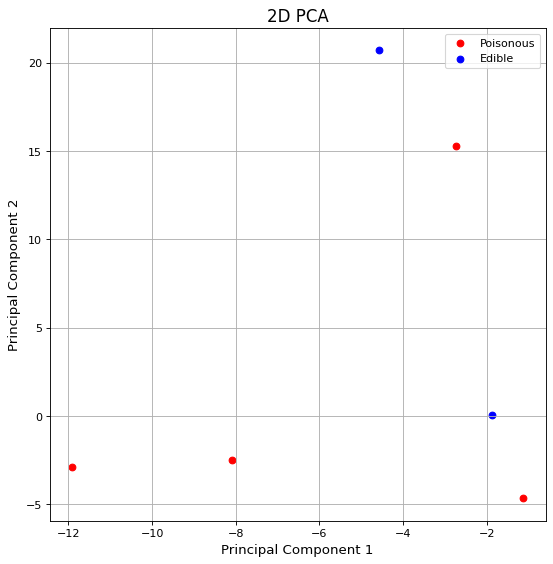

In [8]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Price'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['Price'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

In [9]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

[121.04151967  54.5644589   41.01242682]
1.6274394399999998
[[ 0  0  1  0  0  0]
 [ 0  0  2  0  1  0]
 [ 0  0 14  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.74      1.00      0.85        14
           3       0.00      0.00      0.00         1
           4       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1

    accuracy                           0.73        22
   macro avg       0.37      0.42      0.39        22
weighted avg       0.56      0.73      0.63        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Independent Component Analysis (ICA)
ICA is a linear dimensionality reduction method which takes as input data a mixture of independent components and it aims to correctly identify each of them (deleting all the unnecessary noise). Two input features can be considered independent if both their linear and not linear dependance is equal to zero [1].

Independent Component Analysis is commonly used in medical applications such as EEG and fMRI analysis to separate useful signals from unhelpful ones.

As a simple example of an ICA application, let’s consider we are given an audio registration in which there are two different people talking. Using ICA we could, for example, try to identify the two different independent components in the registration (the two different people). In this way, we could make our unsupervised learning algorithm recognise between the different speakers in the conversation.

Using ICA, we can now again reduce our dataset to just three features, test its accuracy using a Random Forest Classifier and plot the results.

In [13]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

forest_test(X_ica, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


1.176306756999999
[[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 12  0  2  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0  0  1  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.67      0.86      0.75        14
           3       0.00      0.00      0.00         1
           4       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         1

    accuracy                           0.59        22
   macro avg       0.15      0.23      0.18        22
weighted avg       0.45      0.59      0.51        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Linear Discriminant Analysis (LDA)
LDA is supervised learning dimensionality reduction technique and Machine Learning classifier.

LDA aims to maximize the distance between the mean of each class and minimize the spreading within the class itself. LDA uses therefore within classes and between classes as measures. This is a good choice because maximizing the distance between the means of each class when projecting the data in a lower-dimensional space can lead to better classification results (thanks to the reduced overlap between the different classes).

When using LDA, is assumed that the input data follows a Gaussian Distribution (like in this case), therefore applying LDA to not Gaussian data can possibly lead to poor classification results.

In this example, we will run LDA to reduce our dataset to just one feature, test its accuracy and plot the results.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 429
Reduced number of features: 1


In [15]:
forest_test(X_lda, Y)

1.3329302760000026
[[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.64      1.00      0.78        14
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.64        22
   macro avg       0.11      0.17      0.13        22
weighted avg       0.40      0.64      0.49        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.0023075189999985923
[[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  2  0  0  0]
 [ 0  0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.67      1.00      0.80        14
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.64        22
   macro avg       0.11      0.17      0.13        22
weighted avg       0.42      0.64      0.51        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Locally Linear Embedding (LLE)
We have considered so far methods such as PCA and LDA, which are able to perform really well in case of linear relationships between the different features, we will now move on considering how to deal with non-linear cases.

Locally Linear Embedding is a dimensionality reduction technique based on Manifold Learning. A Manifold is an object of D dimensions which is embedded in an higher-dimensional space. Manifold Learning aims then to make this object representable in its original D dimensions instead of being represented in an unnecessary greater space.

A typical example used to explain Manifold Learning in Machine Learning is the Swiss Roll Manifold (Figure 6). We are given as input some data which has a distribution resembling the one of a roll (in a 3D space), and we can then unroll it so that to reduce our data into a two-dimensional space.

Some examples of Manifold Learning algorithms are: Isomap, Locally Linear Embedding, Modified Locally Linear Embedding, Hessian Eigenmapping, etc…

In [17]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_lle = embedding.fit_transform(X)

forest_test(X_lle, Y)

1.1175625250000003
[[ 0  0  1  0  0  0  0]
 [ 0  1  2  0  0  0  0]
 [ 0  0 13  0  0  0  1]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  1]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.33      0.50         3
           2       0.76      0.93      0.84        14
           3       0.00      0.00      0.00         1
           4       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0

    accuracy                           0.68        22
   macro avg       0.32      0.25      0.26        22
weighted avg       0.67      0.68      0.65        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

##t-distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is non-linear dimensionality reduction technique which is typically used to visualize high dimensional datasets. Some of the main applications of t-SNE are Natural Language Processing (NLP), speech processing, etc…

t-SNE works by minimizing the divergence between a distribution constituted by the pairwise probability similarities of the input features in the original high dimensional space and its equivalent in the reduced low dimensional space. t-SNE makes then use of the Kullback-Leiber (KL) divergence in order to measure the dissimilarity of the two different distributions. The KL divergence is then minimized using gradient descent.

When using t-SNE, the higher dimensional space is modelled using a Gaussian Distribution, while the lower-dimensional space is modelled using a Student’s t-distribution. This is done, in order to avoid an imbalance in the neighbouring points distance distribution caused by the translation into a lower-dimensional space.

We are now ready to use TSNE and reduce our dataset to just 3 features.

In [18]:
from sklearn.manifold import TSNE

start = time.process_time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print(time.process_time() - start)

[t-SNE] Computing 72 nearest neighbors...
[t-SNE] Indexed 73 samples in 0.001s...
[t-SNE] Computed neighbors for 73 samples in 0.100s...
[t-SNE] Computed conditional probabilities for sample 73 / 73
[t-SNE] Mean sigma: 16.222635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 117.167099
[t-SNE] KL divergence after 300 iterations: 2.395250
1.8237638090000061


Testing our Random Forest accuracy using the t-SNE reduced subset confirms that now our classes can be easily separated.

In [19]:
forest_test(X_tsne, Y)

1.3674106859999995
[[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 10  0  4  0]
 [ 0  0  1  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  0  1  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.59      0.71      0.65        14
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.45        22
   macro avg       0.10      0.12      0.11        22
weighted avg       0.37      0.45      0.41        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Autoencoders
Autoencoders are a family of Machine Learning algorithms which can be used as a dimensionality reduction technique. The main difference between Autoencoders and other dimensionality reduction techniques is that Autoencoders use non-linear transformations to project data from a high dimension to a lower one.

If all the input features are independent of each other, then the Autoencoder will find particularly difficult to encode and decode to input data into a lower-dimensional space.

Autoencoders can be implemented in Python using Keras API. In this case, we specify in the encoding layer the number of features we want to get our input data reduced to (for this example 3). As we can see from the code snippet below, Autoencoders take X (our input features) as both our features and labels (X, Y).

For this example, I decided to use ReLu as the activation function for the encoding stage and Softmax for the decoding stage. If I wouldn’t have used non-linear activation functions, then the Autoencoder would have tried to reduce the input data using a linear transformation (therefore giving us a result similar to if we would have used PCA).

In [20]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

We can now repeat a similar workflow as in the previous examples, this time using a simple Autoencoder as our Feature Extraction Technique.

In [21]:
forest_test(X_ae, Y)

1.3053631760000002
[[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0  0  1  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.70      1.00      0.82        14
           3       0.00      0.00      0.00         1
           4       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         1

    accuracy                           0.68        22
   macro avg       0.20      0.25      0.22        22
weighted avg       0.49      0.68      0.57        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Source:

https://ppiconsulting.dev/blog/blog29/